In [1]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import matplotlib.pyplot as plt

/Users/mikolajboronski/miniconda3/envs/mil/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = GPT2LMHeadModel.from_pretrained('gpt2')
state_dict = model.state_dict()

for k, v in state_dict.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [20]:
for i in range(0, 12):
    print(state_dict[f"transformer.h.{i}.attn.c_attn.bias"])

tensor([ 0.4803, -0.5254, -0.4293,  ...,  0.0126, -0.0499,  0.0032])
tensor([ 0.0092, -0.1241, -0.2280,  ...,  0.0404,  0.0494, -0.0038])
tensor([-0.0541, -0.0644,  0.0311,  ...,  0.0015, -0.0427,  0.0059])
tensor([-0.2251, -0.0644,  0.0223,  ...,  0.0205, -0.0017, -0.0044])
tensor([-0.0302,  0.1053,  0.1579,  ..., -0.0185, -0.0097,  0.0927])
tensor([-0.0436,  0.0295,  0.0850,  ...,  0.0089, -0.0007,  0.0082])
tensor([ 0.0380,  0.1714, -0.1409,  ..., -0.0441,  0.0544,  0.0041])
tensor([ 0.3779,  0.0767,  0.0019,  ...,  0.0123, -0.0721,  0.0015])
tensor([-0.0167, -0.3909, -0.1419,  ...,  0.0212,  0.0140,  0.0999])
tensor([ 0.0571,  0.0355, -0.0991,  ...,  0.0075,  0.0219, -0.0241])
tensor([-0.0301,  0.1360, -0.3842,  ..., -0.0599,  0.1059,  0.0276])
tensor([-0.2222,  0.0549,  0.0331,  ..., -0.0289, -0.0241,  0.0063])


In [34]:
for k in state_dict.keys():
    if "bias" in k: 
        print(k)
        print(" ", state_dict[k][0])
# for k in state_dict.keys():
#     # if "bias" in k: 
#     if len(state_dict[k][0].shape) == 2:
#         if state_dict[k][0] == -0.0198:
#             print(k)

transformer.h.0.ln_1.bias
  tensor(-0.0037)
transformer.h.0.attn.c_attn.bias
  tensor(0.4803)
transformer.h.0.attn.c_proj.bias
  tensor(0.1503)
transformer.h.0.ln_2.bias
  tensor(0.0425)
transformer.h.0.mlp.c_fc.bias
  tensor(0.0396)
transformer.h.0.mlp.c_proj.bias
  tensor(0.0450)
transformer.h.1.ln_1.bias
  tensor(-0.0036)
transformer.h.1.attn.c_attn.bias
  tensor(0.0092)
transformer.h.1.attn.c_proj.bias
  tensor(-0.0604)
transformer.h.1.ln_2.bias
  tensor(0.0202)
transformer.h.1.mlp.c_fc.bias
  tensor(-0.0624)
transformer.h.1.mlp.c_proj.bias
  tensor(-0.0231)
transformer.h.2.ln_1.bias
  tensor(0.0049)
transformer.h.2.attn.c_attn.bias
  tensor(-0.0541)
transformer.h.2.attn.c_proj.bias
  tensor(0.0207)
transformer.h.2.ln_2.bias
  tensor(0.0432)
transformer.h.2.mlp.c_fc.bias
  tensor(-0.0138)
transformer.h.2.mlp.c_proj.bias
  tensor(-0.0654)
transformer.h.3.ln_1.bias
  tensor(0.0236)
transformer.h.3.attn.c_attn.bias
  tensor(-0.2251)
transformer.h.3.attn.c_proj.bias
  tensor(-0.0142)
t

In [6]:
state_dict["transformer.wte.weight"].view(-1)[:20] # flattened token embeddings

tensor([-0.1101, -0.0393,  0.0331,  0.1338, -0.0485, -0.0789, -0.2398, -0.0895,
         0.0253, -0.1074, -0.1811, -0.0672,  0.0739, -0.0161,  0.0117,  0.1245,
        -0.0020, -0.0815,  0.0338,  0.2365])

In [8]:
state_dict["transformer.wpe.weight"].view(-1)[:20] # flattened position embeddings

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

torch.Size([1024, 768])


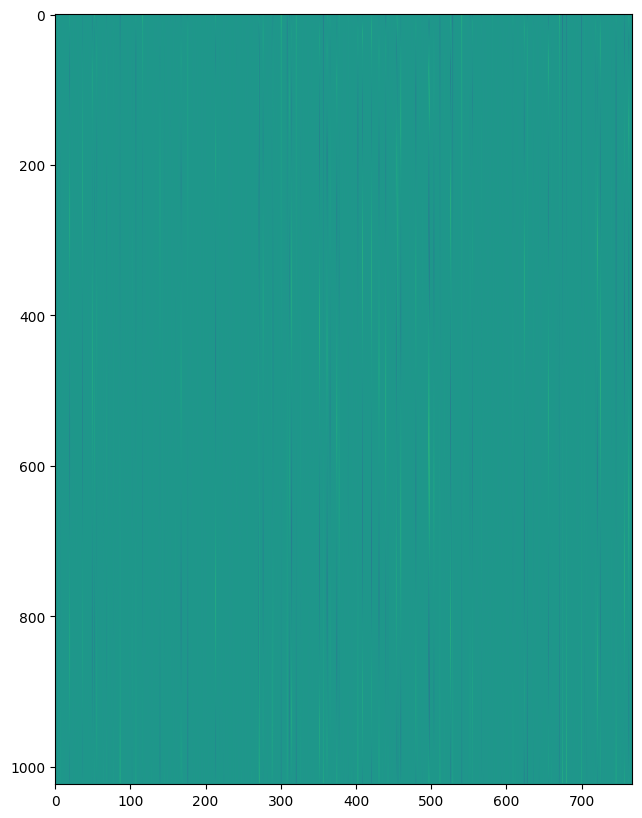

In [17]:
print(state_dict["transformer.wpe.weight"].shape) # (1024, 768), 1024 is the context length for GPT-2
plt.figure(figsize=(10, 10))
plt.imshow(state_dict["transformer.wpe.weight"]) 
# there is a structure somewhat visible, cause every row here is different position encoded

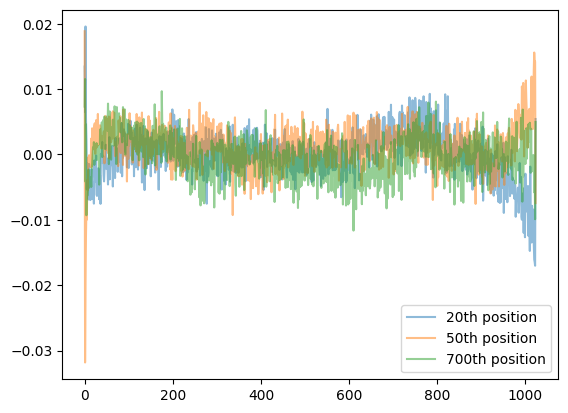

In [22]:
plt.plot(state_dict["transformer.wpe.weight"][:, 20], alpha=0.5, label="20th position")
plt.plot(state_dict["transformer.wpe.weight"][:, 50], alpha=0.5, label="50th position")
plt.plot(state_dict["transformer.wpe.weight"][:, 700], alpha=0.5, label="700th position")
plt.legend()

# each of the lines is responsible for scaling one of 768 dimensions of the token embeddings
# for example: 
#   blue line tends to make tokens after 900th position smaller
#   orange line tends to make tokens after 900th position larger

# according to Karpathy: the way these embedding lines are noisy, tells that the model
# could be train a little more, and is undertrained right now

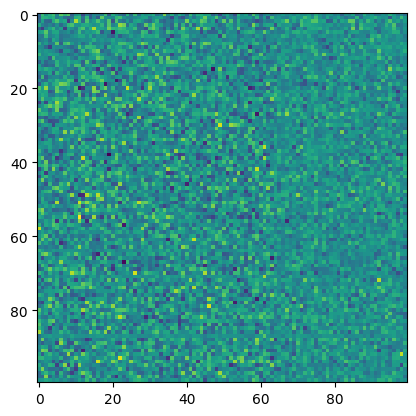

In [25]:
plt.imshow(state_dict["transformer.h.1.attn.c_attn.weight"][:100, :100])
# yeah there is something, possibly, maybe
# but thats when i get to mechanistic interptretability

In [29]:
from transformers import set_seed, pipeline
generator = pipeline('text-generation', model=model, tokenizer=GPT2Tokenizer.from_pretrained('gpt2'))
set_seed(42)
generator("Hello, I'm a language model,", max_length=20, num_return_sequences=5)

tokenizer_config.json: 100%|██████████| 26.0/26.0 [00:00<00:00, 158kB/s]
vocab.json: 100%|██████████| 1.04M/1.04M [00:00<00:00, 2.16MB/s]
merges.txt: 100%|██████████| 456k/456k [00:00<00:00, 1.36MB/s]
tokenizer.json: 100%|██████████| 1.36M/1.36M [00:00<00:00, 2.47MB/s]
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, I'm writing a new language for you. But first,"},
 {'generated_text': "Hello, I'm a language model, and I'm trying to be as expressive as possible. In"},
 {'generated_text': "Hello, I'm a language model, so I don't get much of a license anymore, but"},
 {'generated_text': "Hello, I'm a language model, a functional model... It's not me, it's me"},
 {'generated_text': "Hello, I'm a language model, not an object model.\n\nIn a nutshell, I"}]

In [37]:
with open("input.txt", "r") as f:
    text = f.read()
data = text[:1000]
print(data[:100])

import tiktoken
enc = tiktoken.get_encoding("gpt2")
tokens = enc.encode(data)
print(tokens[:24])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You
[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248, 461, 11, 2740, 13]


In [43]:
# now this big ass text
!wc input.txt
# 40000 lines
# 202651 words
# 1115394 bytes (~letters)
# needs to be chunked into parts that we can feed the transformer with

# Andrej says this is a good way to do it, I listen
import torch
buf = torch.tensor(tokens[:24])
x   = buf.view(6, 4)
x2  = buf.reshape(6, 4)
print(x)
print(x2)
# apparently reshape is better since it can handle non-contigous tensors
# but with view you can be sure that it will use the same memory area as the viewed object
# reshape may or may not return a copy

# also a simple way to do both training data and labels, is just taking t and t+1
buf = torch.tensor(tokens[:24 + 1])
x   = buf[:-1].view(6, 4)
y   = buf[1:].view(6, 4)
print(x)
print(y)

   40000  202651 1115394 input.txt
tensor([[ 5962, 22307,    25,   198],
        [ 8421,   356,  5120,   597],
        [ 2252,    11,  3285,   502],
        [ 2740,    13,   198,   198],
        [ 3237,    25,   198,  5248],
        [  461,    11,  2740,    13]])
tensor([[ 5962, 22307,    25,   198],
        [ 8421,   356,  5120,   597],
        [ 2252,    11,  3285,   502],
        [ 2740,    13,   198,   198],
        [ 3237,    25,   198,  5248],
        [  461,    11,  2740,    13]])
tensor([[ 5962, 22307,    25,   198],
        [ 8421,   356,  5120,   597],
        [ 2252,    11,  3285,   502],
        [ 2740,    13,   198,   198],
        [ 3237,    25,   198,  5248],
        [  461,    11,  2740,    13]])
tensor([[22307,    25,   198,  8421],
        [  356,  5120,   597,  2252],
        [   11,  3285,   502,  2740],
        [   13,   198,   198,  3237],
        [   25,   198,  5248,   461],
        [   11,  2740,    13,   198]])


### How variance grows in residual streams

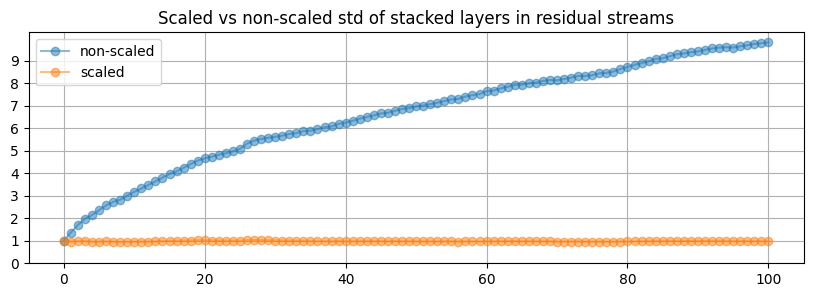

In [63]:
import matplotlib.pyplot as plt
import math
import numpy as np

x = torch.randn(768)
temporary_x_std = [x.std()]
temporary_x_std_normed = [x.std()]
for i in range(100):
    x += torch.randn(768)
    temporary_x_std.append(x.std())
    temporary_x_std_normed.append(x.std()/math.sqrt(i+2))

plt.figure(figsize=(10, 3))
plt.title("Scaled vs non-scaled std of stacked layers in residual streams")
plt.plot(temporary_x_std, marker="o", alpha=0.5, label="non-scaled")
plt.plot(temporary_x_std_normed, marker="o", alpha=0.5, label="scaled")
plt.yticks(np.arange(0, 10, 1))
plt.grid()
plt.legend()

the above is not really right, we want the **accumulated** std to be equal to 1 so that after a forward pass the total growth is controlled

im still unsure about this, but it has a notion of sense

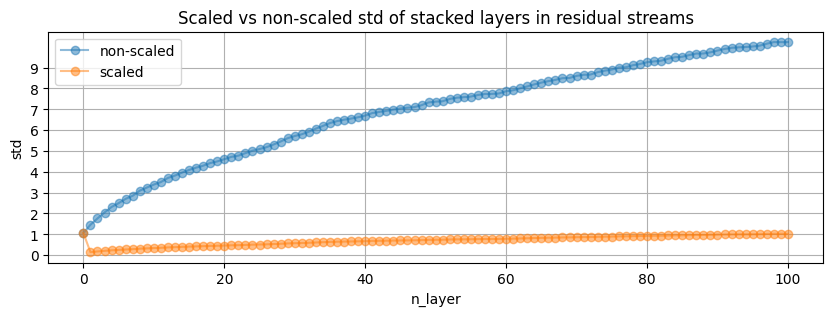

In [65]:
import matplotlib.pyplot as plt
import math
import numpy as np

x = torch.randn(768)
temporary_x_std = [x.std()]
temporary_x_std_normed = [x.std()]
for i in range(100):
    x += torch.randn(768)
    temporary_x_std.append(x.std())
    temporary_x_std_normed.append(x.std()/math.sqrt(100))

plt.figure(figsize=(10, 3))
plt.title("Scaled vs non-scaled std of stacked layers in residual streams")
plt.plot(temporary_x_std, marker="o", alpha=0.5, label="non-scaled")
plt.plot(temporary_x_std_normed, marker="o", alpha=0.5, label="scaled")
plt.yticks(np.arange(0, 10, 1))
plt.ylabel("std")
plt.xlabel("n_layer")
plt.grid()
plt.legend()